## Observations and Insights 

#There were more male rats than female rats in this study
#Capomulin was the drug that had the most tests run
#Ketapril had the largest standard deviation, meaning the tumor volumes were more spread apart

In [89]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results)

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice.
mouse_count = combined_df.count()
mouse_count = mouse_count['Mouse ID']
mouse_count

1893

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.groupby('Mouse ID')['Timepoint'].nunique()
duplicate_mice

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [73]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = combined_df[combined_df['Mouse ID'] == 'g989']
g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_mice = combined_df.drop_duplicates(['Mouse ID', 'Timepoint'])
dropped_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = dropped_mice.count()
clean_mouse_count = clean_mouse_count["Mouse ID"]
clean_mouse_count

1888

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_df = combined_df.groupby('Drug Regimen')
drug_regimen_mean = summary_df['Tumor Volume (mm3)'].mean()
drug_regimen_median = summary_df['Tumor Volume (mm3)'].median()
drug_regimen_std = summary_df['Tumor Volume (mm3)'].std()
drug_regimen_sem = summary_df['Tumor Volume (mm3)'].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_summary = pd.DataFrame({'Mean':drug_regimen_mean, 'Median':drug_regimen_median,
                                     'Standard Deviation':drug_regimen_std, 'SEM':drug_regimen_sem})
drug_regimen_summary

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
other_summary = summary_df.agg(['mean', 'median', 'var', 'std', 'sem'])
other_summary

Age_months                                       Weight (g)  \
                   mean median        var       std       sem       mean   
Drug Regimen                                                               
Capomulin     13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
Ceftamin      13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
Infubinol     16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
Ketapril      15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
Naftisol      12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
Placebo       10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
Propriva      10.894410    8.0  53.357531  7.304624  0.575685  27.043478   
Ramicane      10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
Stelasyn      12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
Zoniferol     12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                                                    ... Tumor Volume (mm3)  \
             median        var       std       sem  ...               mean   
Drug Regimen                                        ...                      
Capomulin      20.5   7.466034  2.732404  0.180169  ...          40.675741   
Ceftamin       28.0   2.501016  1.581460  0.118535  ...          52.591172   
Infubinol      27.0   4.769028  2.183810  0.163684  ...          52.884795   
Ketapril       28.0   3.392536  1.841884  0.134333  ...          55.235638   
Naftisol       27.0   2.247748  1.499249  0.109930  ...          54.331565   
Placebo        28.0   3.378146  1.837973  0.136615  ...          54.033581   
Propriva       26.0   2.791848  1.670882  0.131684  ...          52.322552   
Ramicane       19.0  10.465318  3.235014  0.214244  ...          40.216745   
Stelasyn       28.0   2.701473  1.643616  0.122169  ...          54.233149   
Zoniferol      28.0   2.015300  1.419612  0.105229  ...          53.236507   

                                                       Metastatic Sites  \
                 median        var       std       sem             mean   
Drug Regimen                                                              
Capomulin     41.557809  24.947764  4.994774  0.329346         0.713043   
Ceftamin      51.776157  39.290177  6.268188  0.469821         1.179775   
Infubinol     51.820584  43.128684  6.567243  0.492236         0.960674   
Ketapril      53.698743  68.553577  8.279709  0.603860         1.297872   
Naftisol      52.509285  66.173479  8.134708  0.596466         1.182796   
Placebo       52.288934  61.168083  7.821003  0.581331         1.441989   
Propriva      50.854632  42.351070  6.507770  0.512884         0.975155   
Ramicane      40.673236  23.486704  4.846308  0.320955         0.548246   
Stelasyn      52.431737  59.450562  7.710419  0.573111         0.872928   
Zoniferol     51.818479  48.533355  6.966589  0.516398         1.230769   

                                                   
             median       var       std       sem  
Drug Regimen                                       
Capomulin         0  0.720790  0.848993  0.055981  
Ceftamin          1  1.402527  1.184283  0.088766  
Infubinol         1  1.054942  1.027104  0.076985  
Ketapril          1  1.942883  1.393873  0.101659  
Naftisol          1  1.479919  1.216519  0.089200  
Placebo           1  1.792449  1.338824  0.099514  
Propriva          1  1.174379  1.083688  0.085407  
Ramicane          0  0.477838  0.691259  0.045780  
Stelasyn          1  0.944874  0.972046  0.072252  
Zoniferol         1  1.559711  1.248884  0.092573  

[10 rows x 25 columns]

## Bar and Pie Charts

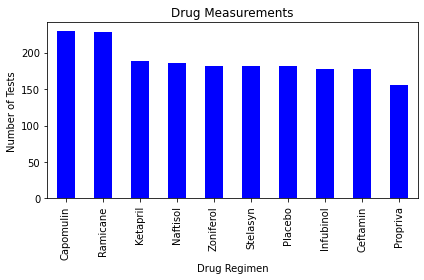

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
graph_info = dropped_mice['Drug Regimen'].value_counts()

bar_graph = graph_info.plot(kind='bar', title = "Drug Measurements", 
                            color='blue')

# set labels
bar_graph.set_xlabel("Drug Regimen")
bar_graph.set_ylabel("Number of Tests")
bar_graph.set_title("Drug Measurements")
bar_graph.plot
plt.tight_layout()



Text(0, 0.5, 'Number of Tests')

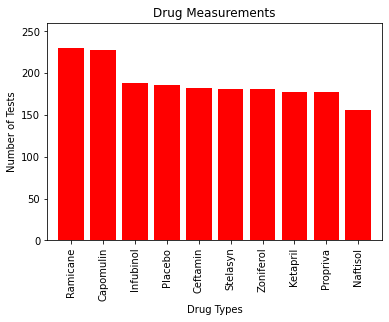

In [79]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = dropped_mice['Drug Regimen'].unique()
# x_axis
y_axis = dropped_mice['Drug Regimen'].value_counts()
# y_axis
plt.bar(x_axis,y_axis,color='r',alpha=1,align='center')
# tickers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "vertical")
# set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0,max(y_axis)+30)
# labels and a Title
plt.title("Drug Measurements")
plt.xlabel("Drug Types")
plt.ylabel("Number of Tests")



Text(0, 0.5, '')

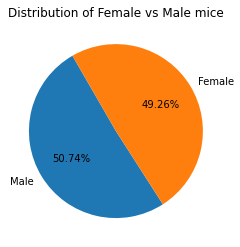

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# separte the sex of the mice
sex = dropped_mice['Sex'].value_counts()
sex
pie_chart = sex.plot.pie(autopct="%1.2f%%", startangle = 120,
                        title = 'Distribution of Female vs Male mice')
# remove the y axis label
pie_chart.set_ylabel('')



Text(0.5, 1.0, 'Distribution of Female vs Male mice')

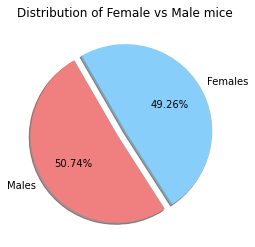

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# labels for sex of mice
labels = ['Males', 'Females']
# values of the sex
sizes = dropped_mice['Sex'].value_counts()
# Colors
colors = ['lightcoral', 'lightskyblue']
# explode feature
explode = (0.1, 0)
#creating the actual pie chart & round percentages to 2 decimals
plt.pie(sizes, explode = explode, labels = labels, colors = colors, 
        autopct="%1.2f%%", shadow = True, startangle = 120)
plt.title('Distribution of Female vs Male mice')



## Quartiles, Outliers and Boxplots

In [82]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin") | (combined_df["Drug Regimen"] == "Ramicane") | (combined_df["Drug Regimen"] == "Ceftamin") | (combined_df["Drug Regimen"] == "Propriva"), :]
drugs
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#CALCULATES ALL FINAL VOLUMES
final_volume = drugs.groupby('Mouse ID').max()['Tumor Volume (mm3)']
final_volume

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_df = pd.merge(dropped_mice, final_volume, how='outer', on='Mouse ID')
treatment_df

refined_treatment_df = treatment_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume",
                                                   "Tumor Volume (mm3)_y" : "Final Tumor Volume"})
refined_treatment_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1884,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1885,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1886,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = refined_treatment_df.loc[(refined_treatment_df["Drug Regimen"] == "Capomulin") | (refined_treatment_df["Drug Regimen"] == "Ramicane") | (refined_treatment_df["Drug Regimen"] == "Ceftamin") | (refined_treatment_df["Drug Regimen"] == "Infubinol"), :]

treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = refined_treatment_df['Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = refined_treatment_df.loc[refined_treatment_df['Drug Regimen'] == treatment, "Tumor Volume"]
tumor_vol
    
    # add subset
    
    # Determine outliers using upper and lower bounds
    #Outliers
outlier_occupancy = refined_treatment_df.loc[(refined_treatment_df['Tumor Volume'] < lower_bound) | (refined_treatment_df['Tumor Volume'] > upper_bound)]
outlier_occupancy
print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 56.32407510749999
The interquartile range of occupancy is: 11.324075107499993
The the median of occupancy is: 48.951421075 


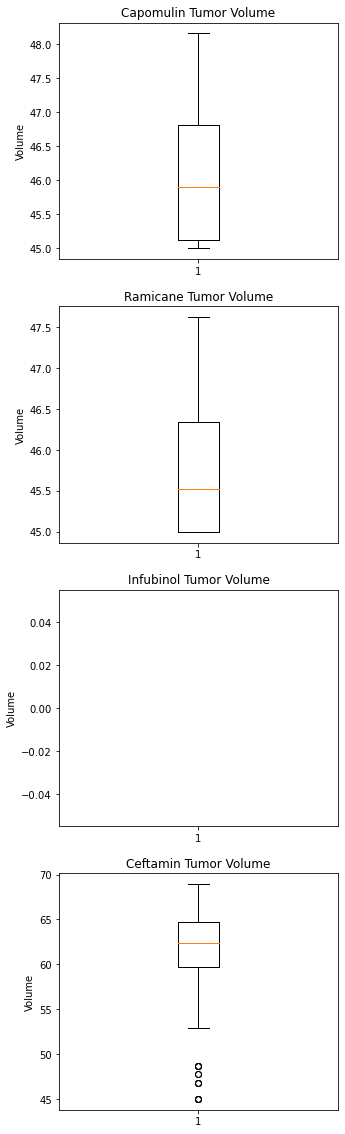

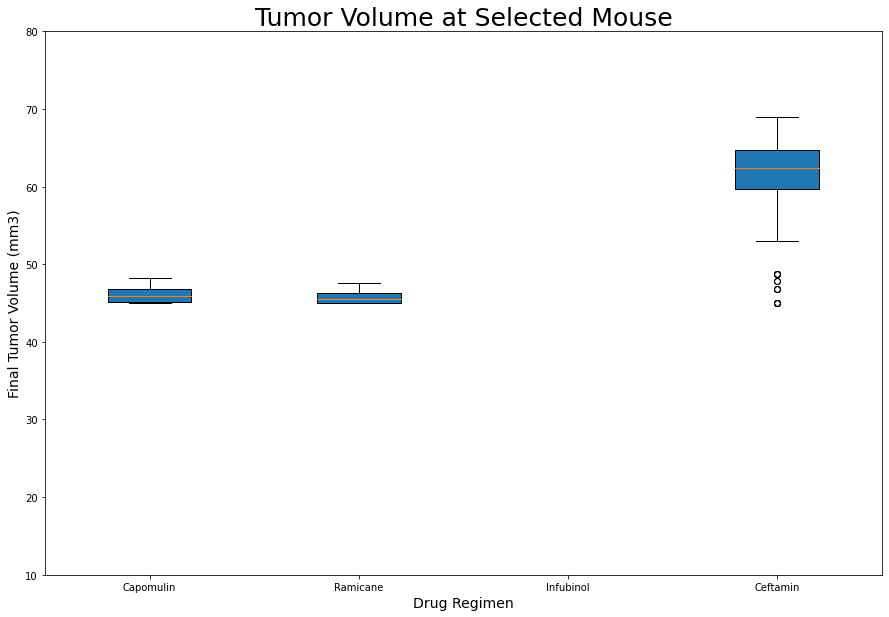

In [92]:
#This Drop NA was added because 
refined_treatment_df = refined_treatment_df.dropna()
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = refined_treatment_df[refined_treatment_df['Drug Regimen'] == 'Capomulin']
ramicane = refined_treatment_df[refined_treatment_df['Drug Regimen'] == 'Ramicane']
infubinol = refined_treatment_df[refined_treatment_df['Drug Regimen'] == 'Infubinol']
ceftamin = refined_treatment_df[refined_treatment_df['Drug Regimen'] == 'Ceftamin']
# set the different drug studies
# for the boxplots
capomulin_tumors = capomulin['Final Tumor Volume']
ramicane_tumors = ramicane['Final Tumor Volume']
infubinol_tumors = infubinol['Final Tumor Volume']
ceftamin_tumors = ceftamin['Final Tumor Volume']
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize=(5,20))
# Capomulin
ax1.set_title("Capomulin Tumor Volume")
ax1.set_ylabel("Volume")
ax1.boxplot(capomulin_tumors)
# Ramicane
ax2.set_title("Ramicane Tumor Volume")
ax2.set_ylabel("Volume")
ax2.boxplot(ramicane_tumors)
# Infubinol
ax3.set_title("Infubinol Tumor Volume")
ax3.set_ylabel("Volume")
ax3.boxplot(infubinol_tumors)
# Ceftamin
ax4.set_title("Ceftamin Tumor Volume")
ax4.set_ylabel("Volume")
ax4.boxplot(ceftamin_tumors)
plt.show()

data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

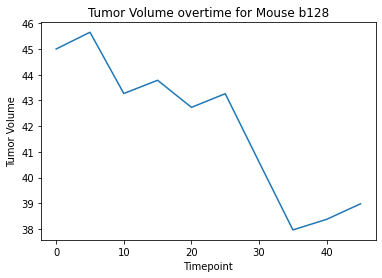

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# set variables
capomulin = refined_treatment_df[(refined_treatment_df['Drug Regimen']=='Capomulin')&(refined_treatment_df['Mouse ID']=='b128')]
tvol = capomulin['Tumor Volume']
timepoint = capomulin['Timepoint']
# plot the graph!
tumor_volume = plt.plot(timepoint,tvol)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume overtime for Mouse b128')
plt.show()

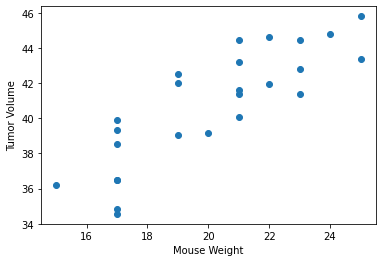

In [86]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = refined_treatment_df[refined_treatment_df['Drug Regimen'] == 'Capomulin']
# set variables
weight = capomulin.groupby(capomulin['Mouse ID'])['Weight (g)'].mean()
tvol = capomulin.groupby(capomulin['Mouse ID'])['Tumor Volume'].mean()
# plot the graph
plt.scatter(weight,tvol)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

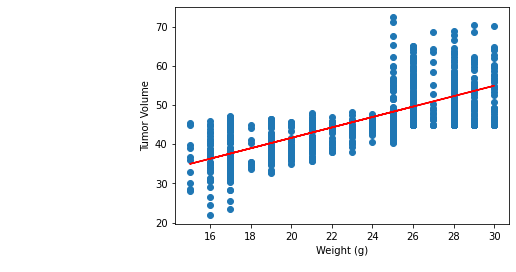

The r-squared is: 0.5237285054760803


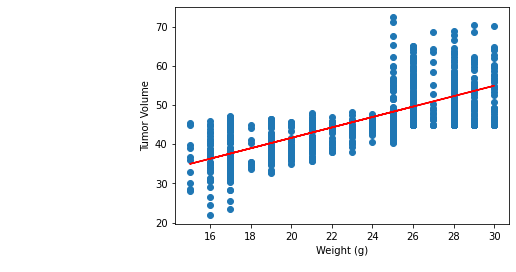

In [93]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = refined_treatment_df['Weight (g)']
y_values = refined_treatment_df['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.show()
#R-Squared Value
# Print out the r-squared value along with the plot.
x_values = refined_treatment_df['Weight (g)']
y_values = refined_treatment_df['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()